# AMAT 502: Modern Computing for Mathematicians
## Lecture 22 - Support Vector Machines (SVM): From Hyperplanes to Kernels
### University at Albany SUNY

# Topics for Today
- Separating Hyperplane Theorem
- Convex Hull
- Linear Classification as an Optimization Problem
    - Definition of a Margin
    - Support Vectors Defined
- Soft Margins and Support Vector Classifier (SVC)
- Dealing with More Complicated Shapes
    - Kernels Defined
    - Support Vector Machines (SVM) defined

## Separating Hyperplane Theorem

<center> 
    
![Separating Hyperplane Theorem](separate-plane.png) 


By Oleg Alexandrov, Jon Watte - Inkscape, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=3917222">Link</a>
</center>

## Hyperplane Separation Theorem (HST)
### Convexity
**Definition:** A set $A\subseteq \mathbb{R}^d$ is **convex** if for every pair of points $x,y\in A$ we have that the line segment connecting them $$\ell(t) = tx +(1-t)y \qquad t\in [0,1]$$ is strictly contained in $A$.
### Hyperplanes
**Definition:** An **affine hyperplane** in $\mathbb{R}^d$ is the set of solutions to an affine equation: $$f(x) = \beta_0 + \beta \cdot x = 0 \qquad \text{for } \beta=(\beta_1,\beta_2,\ldots,\beta_d)$$
### Theorem
Let $A$ and $B$ be two disjoint nonempty convex subsets of $\mathbb{R}^d$. There exist a nonzero vector $v$ and a real number $c$ such that

$$\langle x,v\rangle \geq c\, \text{ and } \langle y,v\rangle \leq c$$

for all $x$ in $A$ and $y$ in $B$; i.e., the hyperplane $\langle \cdot ,v\rangle =c$  where $v$ the normal vector, separates $A$ and $B$.

#### Question: What is the connection between the definition of the affine hyperplane and the statement of the HST?

## What Does this Have to do with Data?

Suppose we have to perform classification on a data set, where we have a collection of $\{x_i\}$ in a $d$-dimensional feature space with two labels $A$ and $B$.

For each class of points, consider the  ***convex hulls***, i.e. the smallest convex sets containing the $A$ points and the smallest convex set containing the $B$ points, then if these convex hulls do not intersect, then they are, by virtue of the HST, **linearly seperable** in $\mathbb{R}^d$.


## Visualizing the Convex Hull of a Point Cloud

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

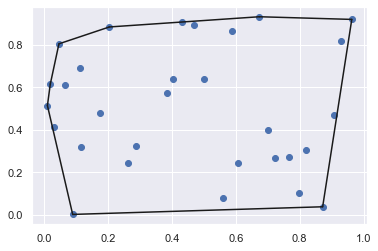

In [2]:
plt.plot(points[:,0], points[:,1], 'o')

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    

In [3]:
# Explain what this code does and how it plots the convex hull
points[hull.simplices[0],1]

array([0.00170416, 0.51444554])

## Two Linearly Separable Sets of Points

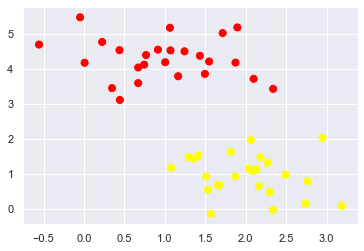

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Coding Exercise: Identifying the Red and Yellow Points

Here is a brute force way of separating out red and yellow points.

**Question: Can you think of easier ways to do this?**

In [5]:
p0=np.zeros((25,2))
p1=np.zeros((25,2))

j=0
k=0

for i in range(50):
    if y[i]==0:
        p0[j,:]=X[i,:]
        j+=1
    else:
        p1[k,:]=X[i,:]
        k+=1
print(p0)
print(X)

[[ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.09680487  3.7174206 ]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.06269622  5.17635143]
 [ 0.669787    3.59540802]
 [ 1.54632313  4.212973  ]
 [ 1.00372519  4.19147702]
 [ 0.3471383   3.45177657]
 [ 0.76752279  4.39759671]]
[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]


### Forming the Convex Hull of the Red and Yellow Points

In [6]:
hull_of_p0 = ConvexHull(p0)
hull_of_p1 = ConvexHull(p1)

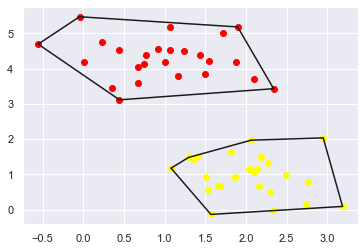

In [7]:
plt.plot(p0[:,0], p0[:,1], 'o', c='red')
plt.plot(p1[:,0], p1[:,1], 'o', c='yellow')

for simplex in hull_of_p0.simplices:
    plt.plot(p0[simplex, 0], p0[simplex, 1], 'k-')

for simplex in hull_of_p1.simplices:
    plt.plot(p1[simplex, 0], p1[simplex, 1], 'k-')

### Hyperplane Separation Theorem Guarantees Existence but not Uniqueness

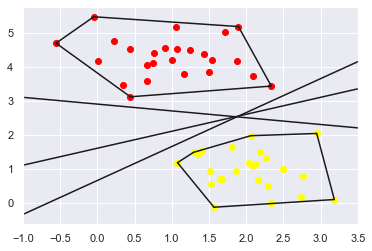

In [8]:
plt.plot(p0[:,0], p0[:,1], 'o', c='red')
plt.plot(p1[:,0], p1[:,1], 'o', c='yellow')

for simplex in hull_of_p0.simplices:
    plt.plot(p0[simplex, 0], p0[simplex, 1], 'k-')

for simplex in hull_of_p1.simplices:
    plt.plot(p1[simplex, 0], p1[simplex, 1], 'k-')

xfit = np.linspace(-1, 3.5)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## Assessing the Quality of a Separating Hyperplane

If we identify the red points with the target/label value $y_i=1$ and yellow points with the target/label value $y_i=-1$, then a separating hyperplane defined by $(\beta_0,\beta_1,\ldots,\beta_d)$ has the property that
$$\beta_0 + \beta_1x_{i1} + \cdots + \beta_dx_{id} > 0 \text{ if } y_i=1$$
and
$$\beta_0 + \beta_1x_{i1} + \cdots + \beta_dx_{id} < 0 \text{ if } y_i=-1$$
Equivalently
$$y_i(\beta_0 + \beta_1x_{i1} + \cdots + \beta_dx_{id}) > 0 \text{ for all } i=1,\ldots,N=\# \text{ samples}$$


## Linear Classifier Model

This specifies a *linear classifier model*, which we can use to predict whether a test point is red or yellow. 

> Let $$f_{\beta}(x)= \beta_0 + \beta_1 x_1 +\cdots + \beta_d x_d$$
> On a test data point $x\in \mathbb{R}^d$
> - If $f_{\beta}(x) > 0$ then declare $x$ a red point. 
> - If $f_{\beta}(x)<0$ then declare $x$ a yellow point

## Margin of a Separating Hyperplane

If $R$ is the set of red points and $Y$ is the set of yellow points, then to each separating hyperplane $(\beta_0,\beta_1,\ldots,\beta_d)$ and assoiciated test function $f_{\beta}(x)$ we define its **margin** to be $$\text{margin of } \beta := \min_{x\in R \cup Y} |f_{\beta}(x)|$$
This is equivalently defined as the distance from the hyper plane $\beta$ to the closest point in the training data set $R\cup Y$.

### Different Margins for Different Models

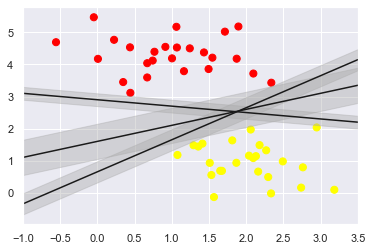

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

## Learning as an Optimization Problem

Recall that in the train-model-predict paradigm, we have a nested subroutine on how to update our model until we've maximized some score function (or minimized some penalty function).

The **maximal margin classifier** is the binary, linear classifier that maximizes its margin on the training data set. This can be written as a convex optimization problem
$$\begin{eqnarray} \text{maximize } M & & \text{over all } \beta\in\mathbb{R}^{d+1} \text{ and } M \in \mathbb{R}  \\ \text{subject to } \sum_{j=1}^d \beta_i^2 & = & 1 \text{ (see N.B. below)} \\  y_i(\beta_0 + \beta_1x_{i1} + \cdots + \beta_dx_{id}) & \geq & M \text{ for all points in the training set} \end{eqnarray}$$

***N.B.*** The normalization condition on $\beta$ makes our search space bounded. Otherwise, if $(\beta_1,\ldots,\beta_d)$ was the normal vector to our hyperplane, then any scalar multiple would be as well.

Luckily there are efficient algorithms that can solve this optimization problem.

In [10]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) #we'll explain C later
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=3, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


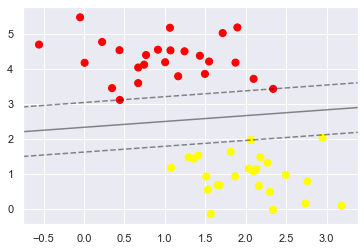

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

## Support Vectors Definition

From [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

> This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin... 
These points are the pivotal elements of this fit, and are known as the ***support vectors, and give the algorithm its name.*** 
In Scikit-Learn, the identity of these points are stored in the `support_vectors_` attribute of the classifier:

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

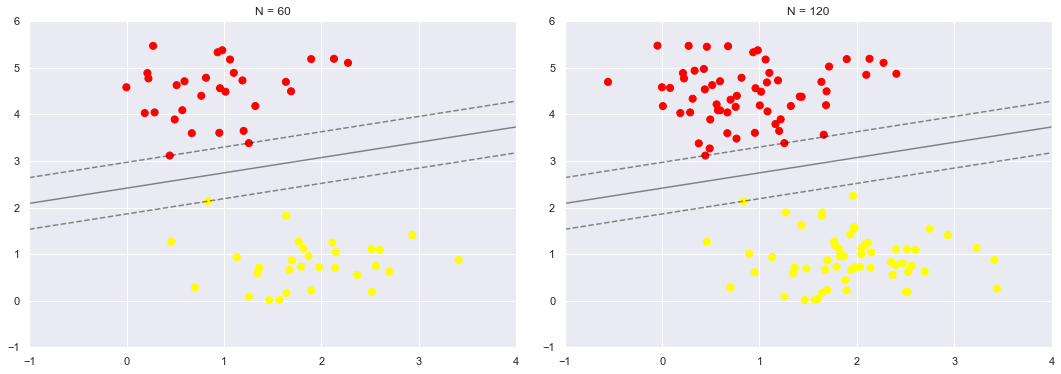

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [15]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 25,75, 150, 300], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 25, 75, 150, 300), value=10), Output()), _dom_cla…

## Support Vector Classifier

Sometimes labeled data is **linearly inseparable**, meaning it cannot be separated using a linear decision boundary. Equivalently, by applying [*modus tollens*](https://en.wikipedia.org/wiki/Modus_tollens), we can infer that the convex hulls must intersect. 

We can modify our classifier to have **soft margins**, which means that some points can be on either side of a hyperplane. This is done by modifying the optimization problem to associate to each point in the sample a slack value $\epsilon_i$. 
The **support vector classifier** is defined to be the optimum solution to the following optimization problem:
$$\begin{eqnarray} \text{maximize } M & & \text{over all } \beta\in\mathbb{R}^{d+1} \text{ and } M \in \mathbb{R}  \\ \text{subject to } \sum_{j=1}^d \beta_i^2 & = & 1 \text{ same N.B. as before} \\  y_i(\beta_0 + \beta_1x_{i1} + \cdots + \beta_dx_{id}) & \geq & M(1 - \epsilon_i)\\
& & \text{ for } i=1,\ldots,N \\ \epsilon_i \geq 0 & \text{ and }& \sum_{i} \epsilon_i \leq C \\
& & \text{ for C a tuning parameter}\end{eqnarray}$$

### A New Example 
Let's walk through the convex hulls and the support vector classifier 

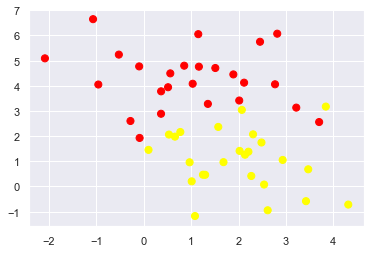

In [16]:
X1, y1 = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn');

In [17]:
q0=np.zeros((25,2))
q1=np.zeros((25,2))

j=0
k=0

for i in range(50):
    if y1[i]==0:
        q0[j,:]=X1[i,:]
        j+=1
    else:
        q1[k,:]=X1[i,:]
        k+=1
print(q0)

[[ 1.88951535  4.44979735]
 [ 2.76916497  4.05759741]
 [-1.07125415  6.6447178 ]
 [ 2.4526189   5.74664315]
 [-0.52708435  5.23677575]
 [ 1.16220699  4.75758235]
 [ 2.01359352  3.4131893 ]
 [ 1.35195132  3.27887244]
 [ 0.5114779   3.94102403]
 [-0.08907282  1.92683157]
 [ 0.85240746  4.79650553]
 [ 3.69997563  2.55854852]
 [ 0.36468746  3.77809817]
 [-2.0873177   5.08812964]
 [ 3.21733967  3.13105387]
 [-0.09828979  4.76807032]
 [ 1.50890596  4.70419652]
 [-0.96040734  4.04849899]
 [ 2.81560514  6.06701785]
 [ 1.14912236  6.04891554]
 [ 0.36330391  2.88702871]
 [ 2.11637618  4.12215868]
 [ 1.0311803   4.07916671]
 [-0.28199348  2.5997658 ]
 [ 0.5587755   4.49140609]]


In [18]:
hull_of_q0 = ConvexHull(q0)
hull_of_q1 = ConvexHull(q1)

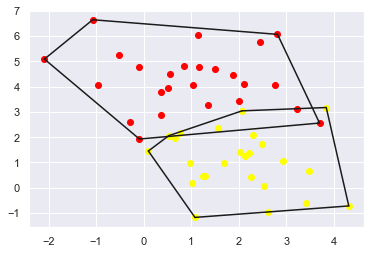

In [19]:
plt.plot(q0[:,0], q0[:,1], 'o', c='red')
plt.plot(q1[:,0], q1[:,1], 'o', c='yellow')

for simplex in hull_of_q0.simplices:
    plt.plot(q0[simplex, 0], q0[simplex, 1], 'k-')

for simplex in hull_of_q1.simplices:
    plt.plot(q1[simplex, 0], q1[simplex, 1], 'k-')

In [20]:
from sklearn.svm import SVC # "Support vector classifier"
model1 = SVC(kernel='linear', C=1000) #C is the tolerance for violating the margin condition
model1.fit(X1, y1)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

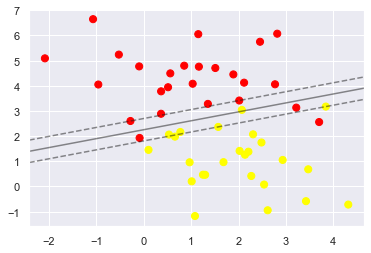

In [21]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn')
plot_svc_decision_function(model1);

## More Complicated Data Shapes

The previous example is still largely separable with a hyperplane. However, if we were to try to classify, say, urban from rural, we'd want to consider some more complicated boundary shape.

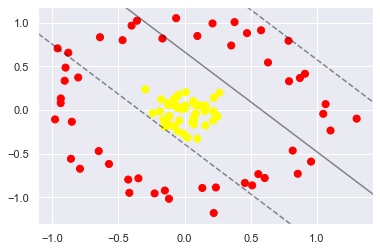

In [22]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Transforming the Data Using a Function

The above data is not well separated using a hyperplane in two dimensions.

However, by feeding the data through a function and working with the graph in *three dimensions* then we can separate these points.

In [23]:
r = np.exp(-(X ** 2).sum(1))

In [28]:
%matplotlib notebook
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

## Support Vector *Machines*

The extra function can be viewed as an additional feature that we have endowed our samples with and is part of a larger class of operations called ***feature engineering***. 

In the above example we chose the perfect extra feature, namely $k(x)=-x_1^2 -x_2^2$, to separate our two classes linearly.

But, how did we know to choose the right function and make that a feature? A slightly different data set would need a different function to separate the red and yellow points.

Coming up with an automatic way to choose the right function that allows us to separate the data is what puts in the ***machine*** in ***support vector machines***. You have to automatically engineer new features to separate the data.

In the above example, a radially increasing function was considered about each point and the best separator was chosen.

## Kernels

Given a set of samples $\mathcal{X}$ a **kernel** is a function 

$$K:\mathcal{X}\times\mathcal{X} \to \mathbb{R}$$
where 
$$\qquad K(x,x')=\langle \varphi(x) , \varphi(x') \rangle$$
for some map $$\varphi:\mathcal{X} \to \mathcal{V}$$
to some vector space $\mathcal{V}$ equipped with an inner product $\langle \bullet, \bullet\rangle$

## A New Optimization Problem

The linear support classifier resulted in a test function $$f(x)=\beta_0 + \sum_{i=1}^N \alpha_i \langle x,x_i\rangle$$
that we could use to test if a test point was red or yellow.

Now SVMs automatically sort through classes of kernels $K$ that result in the best test function of the form
$$f(x)=\beta_0 + \sum_{i=1}^N \alpha_i K(x,x_i)$$

## Radial and Polynomial Kernels

We already encountered an example of a **radial kernel** of the form $$K(x_i,x_i')=\text{exp}(-\gamma\langle x_i,x_i'\rangle^2)$$

Alternatively, we could consider **polynomial kernels** if the form

$$K(x_i,x_i')=(1+ \langle x_i,x_i'\rangle)^d$$
where we can use $d$ as another parameter to tune.

In [29]:
clf = SVC(kernel='rbf', C=1E6) # 'rbf' stands for RADIAL BASIS FUNCTION 
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

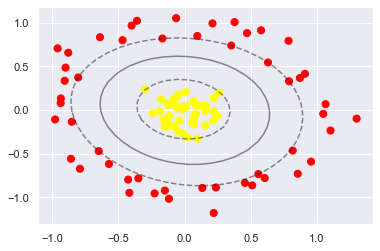

In [30]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## More Cool Examples

VanderPlas considers how to classify faces using SVMs. Check out the end of [Section 5.07 of the Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html).